<center>
<font size="+4"><b>CUSTOMER CHURN ANALYSIS</b></font>

<font size="+2">Author: PLEASANT VIEW JUNIOR</font>

<font size="+1">Data source: Kaggle</font>
</center>

In [147]:
import pandas as pd

df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [148]:
df.head();

In [149]:
df.shape


(7043, 21)

In [150]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [151]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [152]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Key Insights from Customer Data Analysis

## Customer Retention
* The tenure data suggests a challenge with customer retention:
   * 25% of customers have been with the company for 9 months or less.
   * The median tenure is 29 months, meaning half of the customers have been with the company for less than 2.5 years.
   * This indicates a need for strategies to improve customer retention, especially in the first year.

## Pricing Strategy
* The monthly charges data reveals interesting pricing dynamics:
   * The wide range **\$18.25** to **\$118.75** suggests tiered pricing or different service levels.
   * The median charge **\$70.35** being higher than the mean **\$64.76** indicates that there are more high-paying customers, but some lower-priced plans are pulling the average down.
   * This could imply an opportunity to upsell customers on lower-tier plans or to introduce mid-range options.

## Senior Citizen Market
* With 16.21% of customers being senior citizens, this represents a significant minority.
* It would be worth investigating if senior citizens have different patterns in terms of tenure or monthly charges.
* This could inform targeted marketing or service offerings for this demographic.

## Customer Segmentation
* The data suggests at least three potential customer segments:
   * New customers (less than 9 months)
   * Mid-term customers (9-55 months)
   * Long-term loyal customers (over 55 months)
* Each of these groups might benefit from different retention strategies or service offerings.

## Churn Risk
* The large number of customers with low tenure suggests a high churn rate.
* Focusing on the factors that keep the long-term customers (those in the 72-month range) could provide insights for reducing churn.

## Pricing Optimization
* The concentration of monthly charges between $35.50 and $89.85 (50% of customers) suggests this is the sweet spot for pricing.
* There might be an opportunity to introduce more options within this range to better cater to customer needs and potentially increase revenue.

## Service Usage
* The variation in monthly charges likely reflects different levels of service usage.
* Analyzing the correlation between tenure and monthly charges could reveal if long-term customers tend to use more services or if higher-paying customers tend to stay longer.

## Market Positioning
* The maximum monthly charge of $118.75 might indicate a premium service tier.
* Investigating the features and customer satisfaction at this tier could provide insights for improving other service levels.

# Key Insights Summary

1. About **1 in 6** customers are senior citizens.
2. The average customer has been with the company for about **2.7 years**.
3. There's a wide range of monthly charges, from **\$18.25** to **\$118.75**, with an average of **\$64.76**.
4. The tenure distribution is slightly right-skewed, meaning there are some long-term customers pulling the average up.

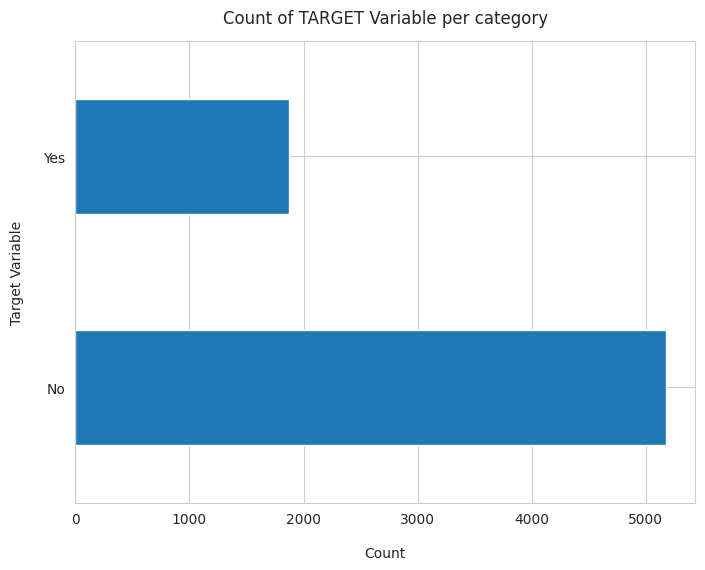

In [153]:
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

#horizontal bar plot to visualize the distribution of the 'Churn' variable in the dataset
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [154]:
#percentage distribution of the values in the Churn column.
100*df['Churn'].value_counts()/len(df['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [155]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

**Majority of customers in this dataset have not churned (73.46%), while a smaller portion of customers have churned (26.54%).**<br>
Investigate the factors contributing to customer churn by analyzing other variables in the dataset.

In [156]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


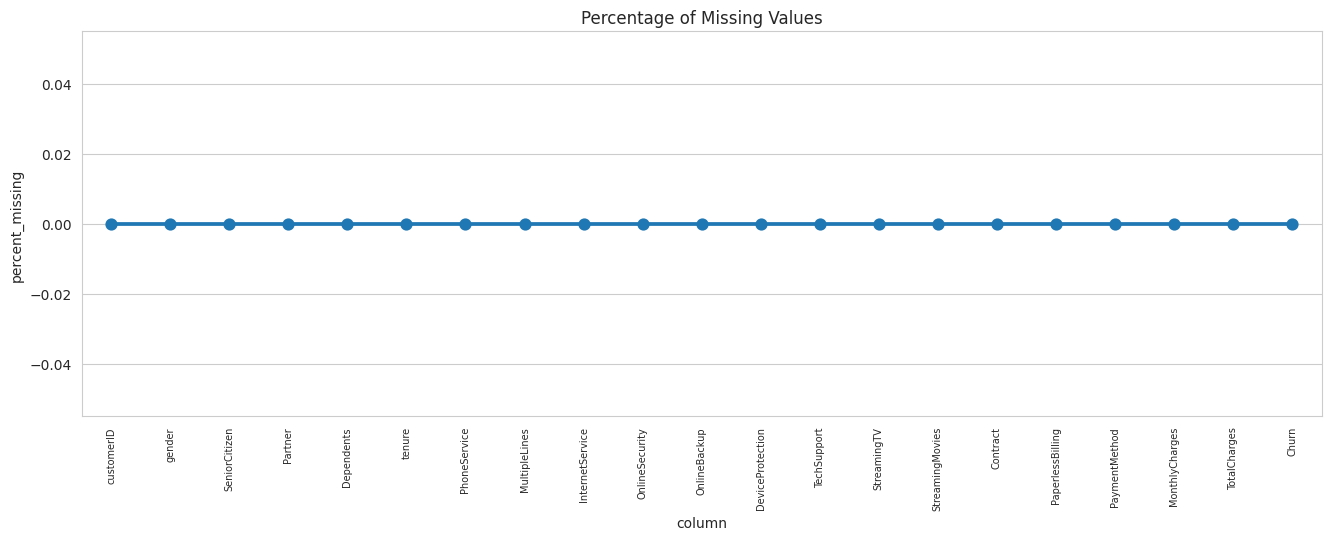

In [157]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#percentage of missing values for each column
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['column', 'percent_missing']

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='column', y='percent_missing', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.show()


<h1>We have no missing data</h1>

<center ><font size="+4"><b>Data Cleaning</b></font></center>

In [158]:
customer_data = df.copy()

In [159]:
#Convert Total Charges to numeric
customer_data.TotalCharges = pd.to_numeric(customer_data.TotalCharges, errors='coerce')
customer_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [160]:
#Checking the null values as seen in the aboe in the TotalCharges
customer_data.loc[customer_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [161]:
#Dealing with missing values that are less than 1%, we drop them
customer_data.dropna(how = 'any', inplace = True)

#Checking the tenure max to group into bins
print(customer_data['tenure'].max())

72


In [162]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

customer_data['tenure_group'] = pd.cut(customer_data.tenure, range(1, 80, 12), right=False, labels=labels)
customer_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [163]:
#Remove columns that we do not need
customer_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


<center><font size="+3">Data Exploration</font></center>
<h1>Univariate Analysis</h1>

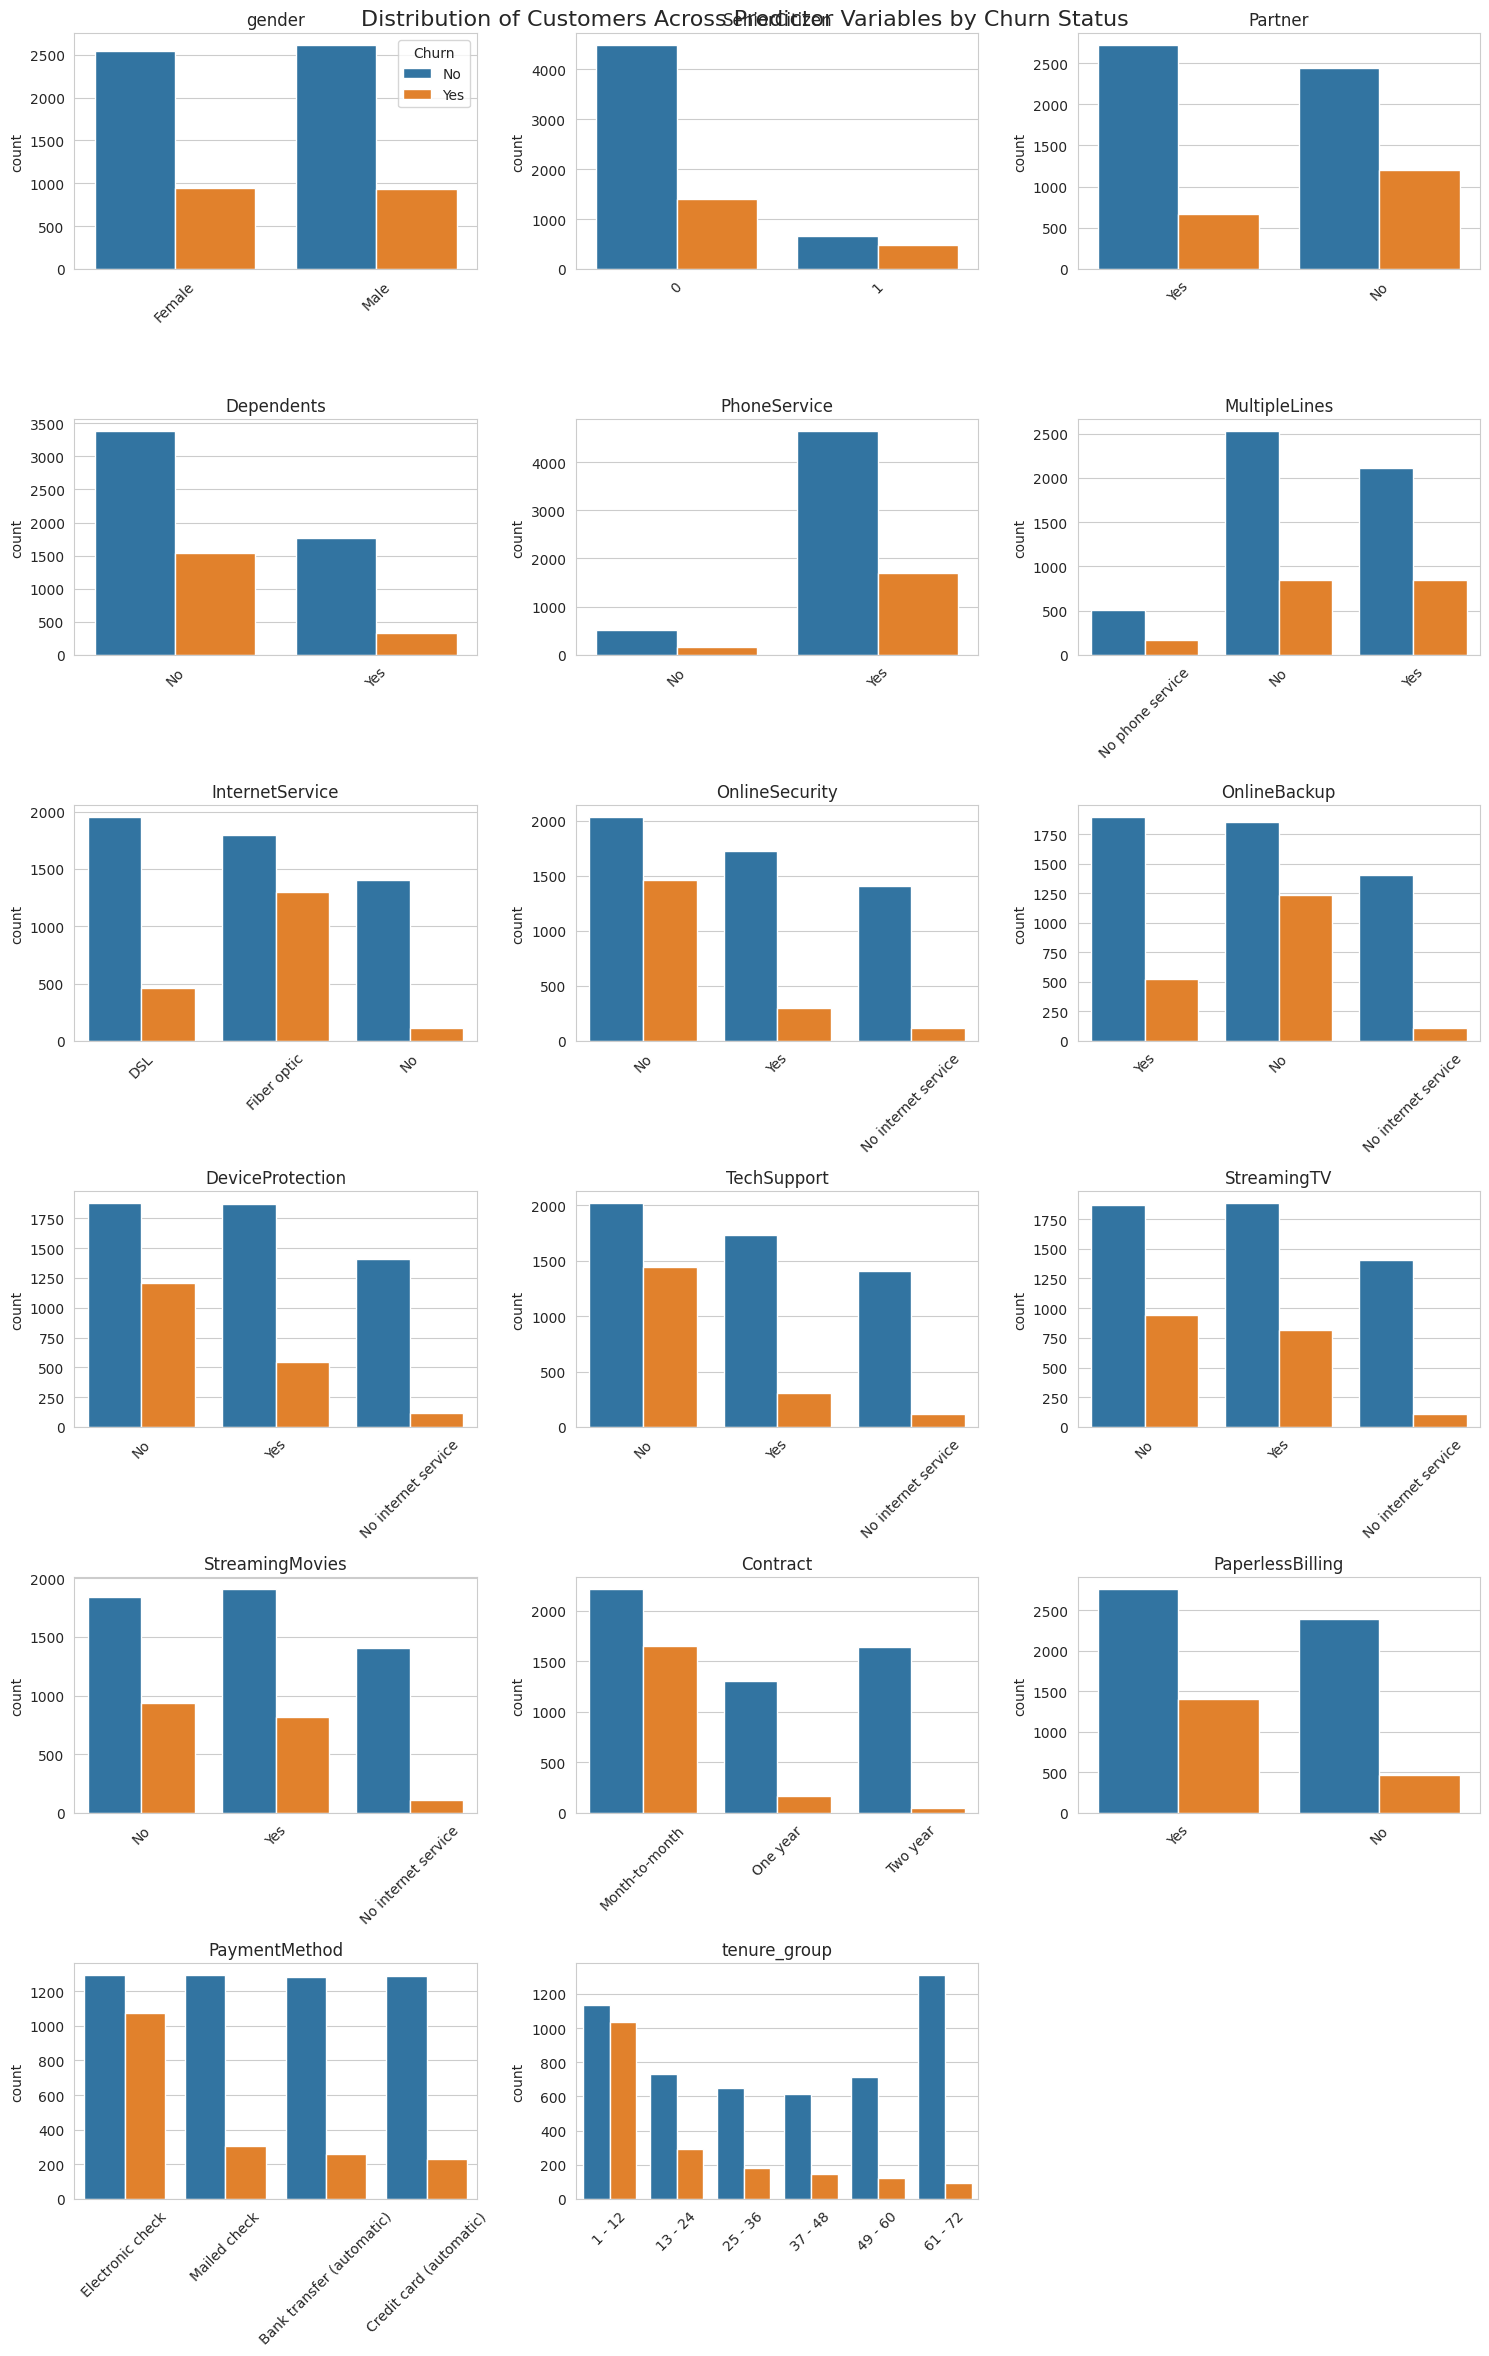

In [164]:
import math

# Select predictor variables
predictors = customer_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']).columns

# Calculate the number of rows and columns for the subplot grid
n_predictors = len(predictors)
n_cols = 3  # You can adjust this
n_rows = math.ceil(n_predictors / n_cols)

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
fig.suptitle('Distribution of Customers Across Predictor Variables by Churn Status', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create a countplot for each predictor
for i, predictor in enumerate(predictors):
    sns.countplot(data=customer_data, x=predictor, hue='Churn', ax=axes[i])
    axes[i].set_title(predictor)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

    # Remove legend for all but the first plot
    if i != 0:
        axes[i].get_legend().remove()

# Remove any unused subplots
for i in range(n_predictors, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [165]:
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [166]:
# List of potentially binary columns
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'TechSupport', 'StreamingTV',
                  'StreamingMovies', 'PaperlessBilling', 'Churn']

# Convert 'Yes'/'No' to 1/0 for existing binary columns
for col in binary_columns:
    if col in customer_data.columns:
        customer_data[col] = customer_data[col].map({'Yes': 1, 'No': 0})

# Handle 'SeniorCitizen' separately as it might be coded as 0/1 already
if 'SeniorCitizen' in customer_data.columns:
    if customer_data['SeniorCitizen'].dtype != 'int64':
        customer_data['SeniorCitizen'] = customer_data['SeniorCitizen'].map({'Yes': 1, 'No': 0})

# List of potential categorical columns
categorical_columns = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'Contract', 'PaymentMethod',
                       'tenure_group']

# Filter out non-existent columns
existing_cat_columns = [col for col in categorical_columns if col in customer_data.columns]

# Perform one-hot encoding on existing categorical columns
customer_data = pd.get_dummies(customer_data, columns=existing_cat_columns, dtype=float)

# Specify columns that should remain as float
float_columns = ['MonthlyCharges', 'TotalCharges']

# Convert columns to int, handling NaN values
for col in customer_data.columns:
    if col not in float_columns:
        customer_data[col] = customer_data[col].fillna(0).astype(int)

# Save the result to a CSV file
# customer_data.to_csv('converted_customer_data.csv', index=False)

In [167]:
customer_data.head()

,SeniorCitizen,Partner,Dependents,PhoneService,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,0,0,0,0,0,1,29.85,29.85,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,56.95,1889.50,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,1,0,0,0,1,53.85,108.15,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,42.30,1840.75,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,1,70.70,151.65,...,0,0,1,0,1,0,0,0,0,0


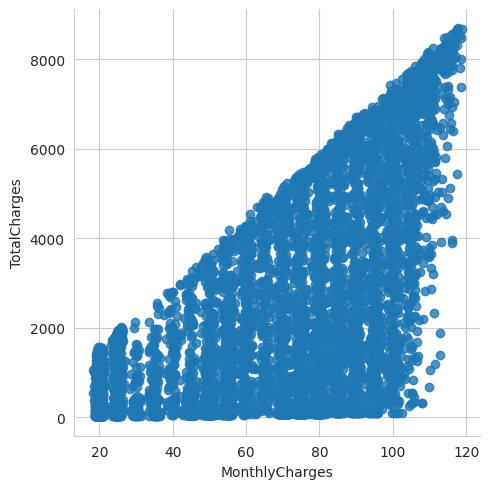

In [168]:
#Relationship between monthly charges and total charges
sns.lmplot(data=customer_data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Intuition - monthly charges increase increases total charges<br>
in this case, true

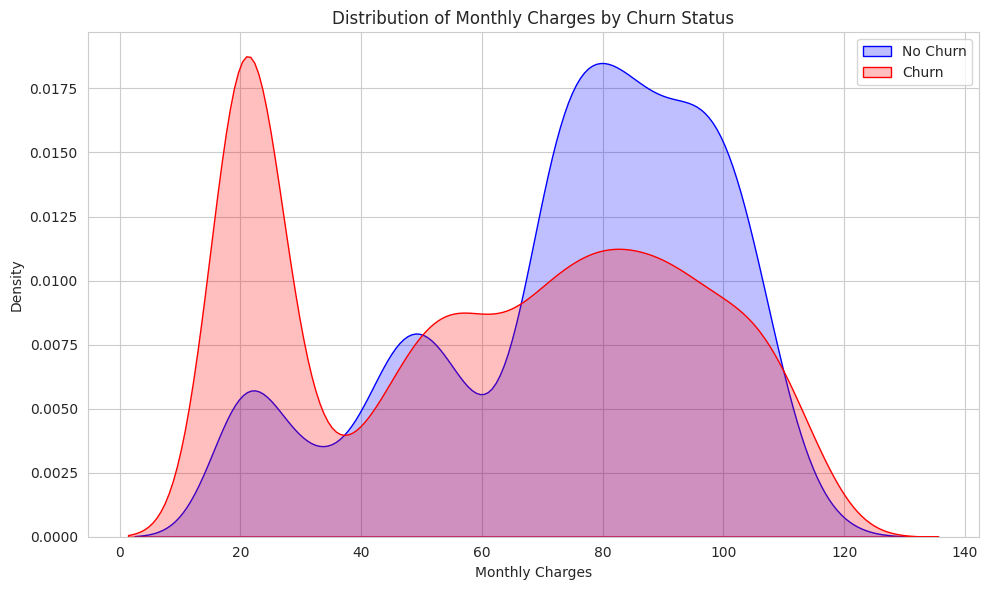

In [169]:
# Ensure Churn is categorical
customer_data['Churn'] = customer_data['Churn'].astype('category')

# Set the style for the plot
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
Mth = sns.kdeplot(data=customer_data, x="MonthlyCharges", hue="Churn",
                  fill=True, common_norm=False, palette=["Red", "Blue"])

# Customize the plot
Mth.legend(["No Churn", "Churn"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Distribution of Monthly Charges by Churn Status')

# Show the plot
plt.tight_layout()
plt.show()

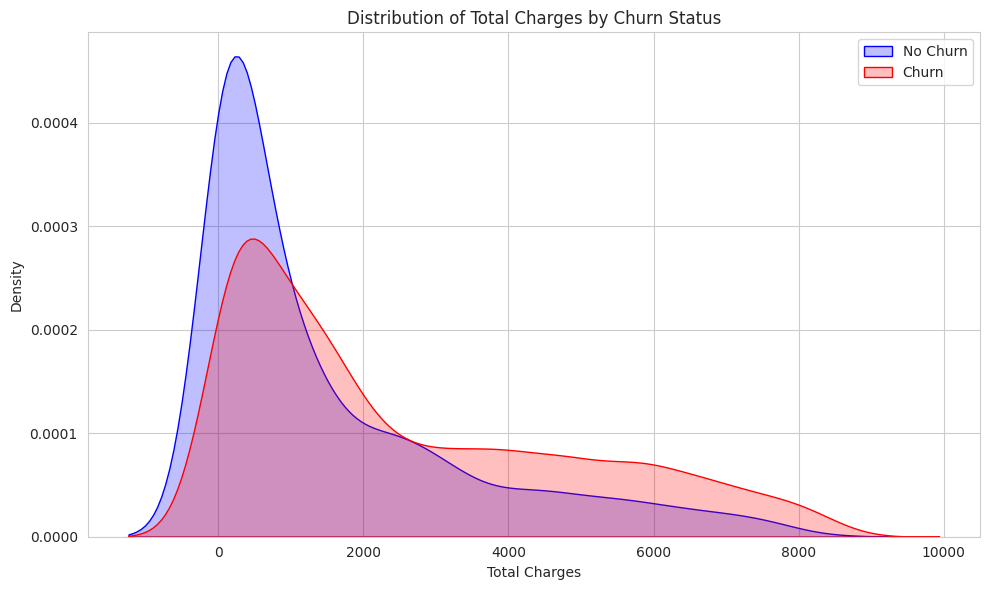

In [170]:
# Ensure Churn is categorical
customer_data['Churn'] = customer_data['Churn'].astype('category')

# Set the style for the plot
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
Tot = sns.kdeplot(data=customer_data, x="TotalCharges", hue="Churn",
                  fill=True, common_norm=False, palette=["Red", "Blue"])

# Customize the plot
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Distribution of Total Charges by Churn Status')

# Show the plot
plt.tight_layout()
plt.show()

# Insights from the Monthly Charges vs. Churn chart:

1. **Higher Monthly Charges Correlate with Increased Churn Risk:**
   - The density plot for churned customers is shifted to the right compared to non-churned customers.
   - This indicates that customers with higher monthly charges are more likely to churn.

2. **Overlapping Densities: Overlap in Monthly Charges between Churned and Non-Churned Customers**
   - There is a significant overlap in the density distributions of both groups.
   - This suggests that monthly charges alone cannot fully explain customer churn behavior.
   - Other factors must also be considered when predicting churn.

3. **Distribution Similarities and High-Charge Group:**
   - The distribution of monthly charges is similar for both churned and non-churned customers, with a peak around $60.
   - There is a small group of customers with very high monthly charges who are more likely to churn.

# Insights from the Total Charges vs. Churn chart:

1. **Total Charges Show Similar Trends: Higher Total Charges Associated with Lower Churn Risk**
   - The overall pattern observed in the monthly charges chart is reflected in the total charges chart.
   - Customers with higher total charges have a higher likelihood of churning.

2. **Wider Spread for Churned Customers:**
   - The density plot for churned customers is more spread out compared to non-churned customers.
   - This indicates that churned customers exhibit a wider range of total charges.
   - This suggests that total charges might be a slightly better predictor of churn compared to monthly charges.

3. **Potential Threshold:**
   - There seems to be a potential threshold around $3,000 in total charges.
   - Customers with total charges exceeding this threshold have a significantly higher churn risk.

4. **Distribution Differences and High-Risk Group:**
   - The distribution of total charges is different for churned and non-churned customers, with churned customers having a wider distribution.
   - There is a group of customers with very high total charges who are almost certain to churn.

In [171]:
# # Set the style and figure size
# plt.style.use('seaborn')
# plt.figure(figsize=(12, 8))

# # Create the scatter plot
# scatter = plt.scatter(customer_data['tenure'],
#                       customer_data['MonthlyCharges'],
#                       s=customer_data['TotalCharges'] / 10,  # Adjust size for visibility
#                       c=customer_data['Churn'],
#                       cmap='coolwarm',
#                       alpha=0.6)

# # Customize the plot
# plt.xlabel('Tenure (months)', fontsize=12)
# plt.ylabel('Monthly Charges ($)', fontsize=12)
# plt.title('Relationship between Tenure, Monthly Charges, Total Charges, and Churn', fontsize=14)

# # Add a color bar
# cbar = plt.colorbar(scatter)
# cbar.set_label('Churn', fontsize=12)

# # Add a legend for Total Charges
# sizes = [1000, 3000, 5000, 7000]
# labels = ['$1000', '$3000', '$5000', '$7000']
# legend_elements = [plt.scatter([], [], s=size/10, c='gray', alpha=0.6, label=label)
#                    for size, label in zip(sizes, labels)]
# plt.legend(handles=legend_elements, title='Total Charges', loc='upper left', title_fontsize=12)

# # Add text annotations
# plt.text(0.05, 0.95, 'High Churn Risk Zone', transform=plt.gca().transAxes,
#          fontsize=12, verticalalignment='top', color='red')
# plt.annotate('', xy=(10, 100), xytext=(30, 80),
#              arrowprops=dict(facecolor='red', shrink=0.05))

# plt.tight_layout()
# plt.show()

<ipython-input-171-72fa14b062f5>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


KeyError: 'tenure'

<Figure size 1200x800 with 0 Axes>

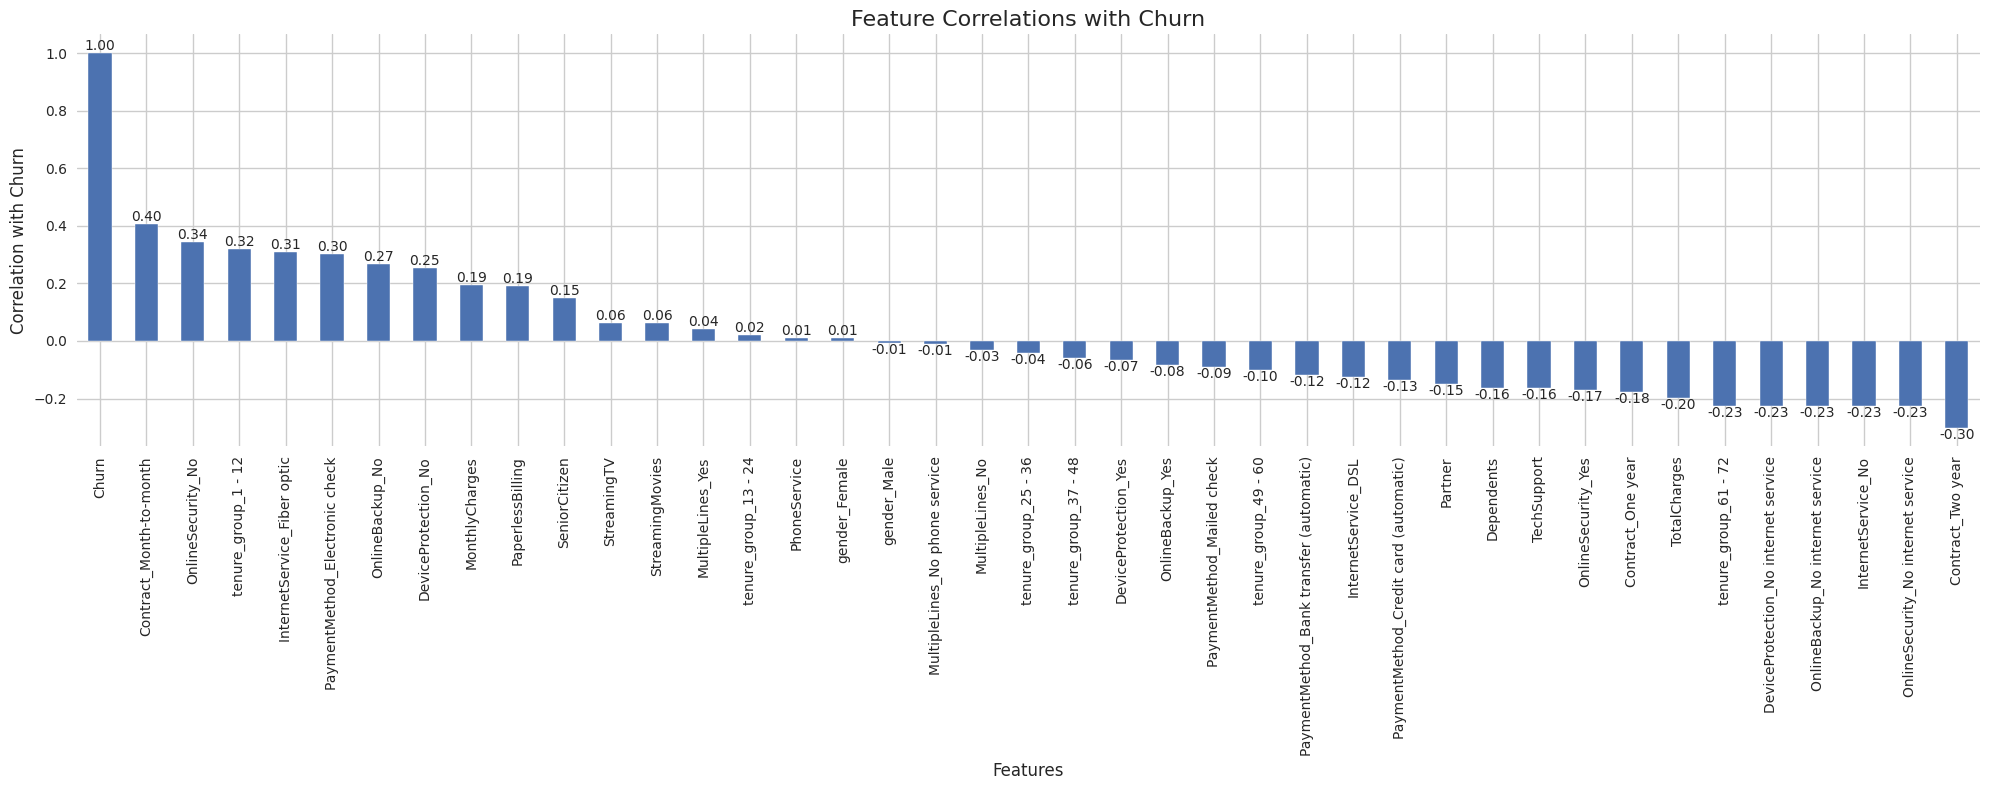

In [175]:
# Set the style using seaborn directly
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(20, 8))

# Calculate correlations and sort
correlations = customer_data.corr()['Churn'].sort_values(ascending=False)

# Plot correlations
correlations.plot(kind='bar')

# Customize the plot
plt.title('Feature Correlations with Churn', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation with Churn', fontsize=12)
plt.xticks(rotation=90)

# Add correlation values on top of each bar
for i, v in enumerate(correlations):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Insights from the Churn Correlation Chart

## 1. Strongest Correlations with Churn:

- **MonthlyCharges:** Positive correlation indicates higher monthly charges are associated with higher churn risk.
- **TotalCharges:** Positive correlation suggests customers with higher total charges are more likely to churn.
- **gender_Male:** Male customers have a slightly higher churn risk compared to females.
- **Partner_No:** Customers without a partner have a higher likelihood of churning.
- **Dependents_No:** Customers without dependents are more likely to churn.
- **PhoneService_No:** Customers without phone service have a significantly higher churn risk.
- **TechSupport_No:** Customers not using tech support have a higher chance of churning.
- **StreamingTV_No:** Customers not subscribed to streaming TV have a higher churn risk.
- **StreamingMovies_No:** Customers not subscribed to streaming movies are more likely to churn.
- **PaperlessBilling_Yes:** Customers using paperless billing have a slightly higher churn risk.
- **PaymentMethod_Electronic check:** Customers using electronic check as their payment method have a higher churn risk.
- **tenure_group_1 - 11:** Customers in the first tenure group (0-11 months) have the highest churn risk.

## 2. Weak Correlations with Churn:

- **SeniorCitizen:** Weak positive correlation suggests senior citizens have a slightly higher churn risk.
- **MultipleLines:** Weak positive correlation indicates customers with multiple lines have a marginally higher churn risk.
- **OnlineSecurity:** Weak negative correlation suggests customers using online security have a slightly lower churn risk.
- **OnlineBackup:** Weak negative correlation indicates customers using online backup have a slightly lower churn risk.
- **DeviceProtection:** Weak negative correlation suggests customers with device protection have a slightly lower churn risk.
- **InternetService_Fiber optic:** Weak negative correlation indicates customers with fiber optic internet have a slightly lower churn risk.

## 3. Interpretation:

- The analysis highlights factors strongly associated with increased churn risk, such as high monthly charges, lack of bundled services, and absence of certain optional services.
- These insights can guide targeted strategies to reduce customer churn, such as offering personalized discounts, bundled packages, and improved customer support.

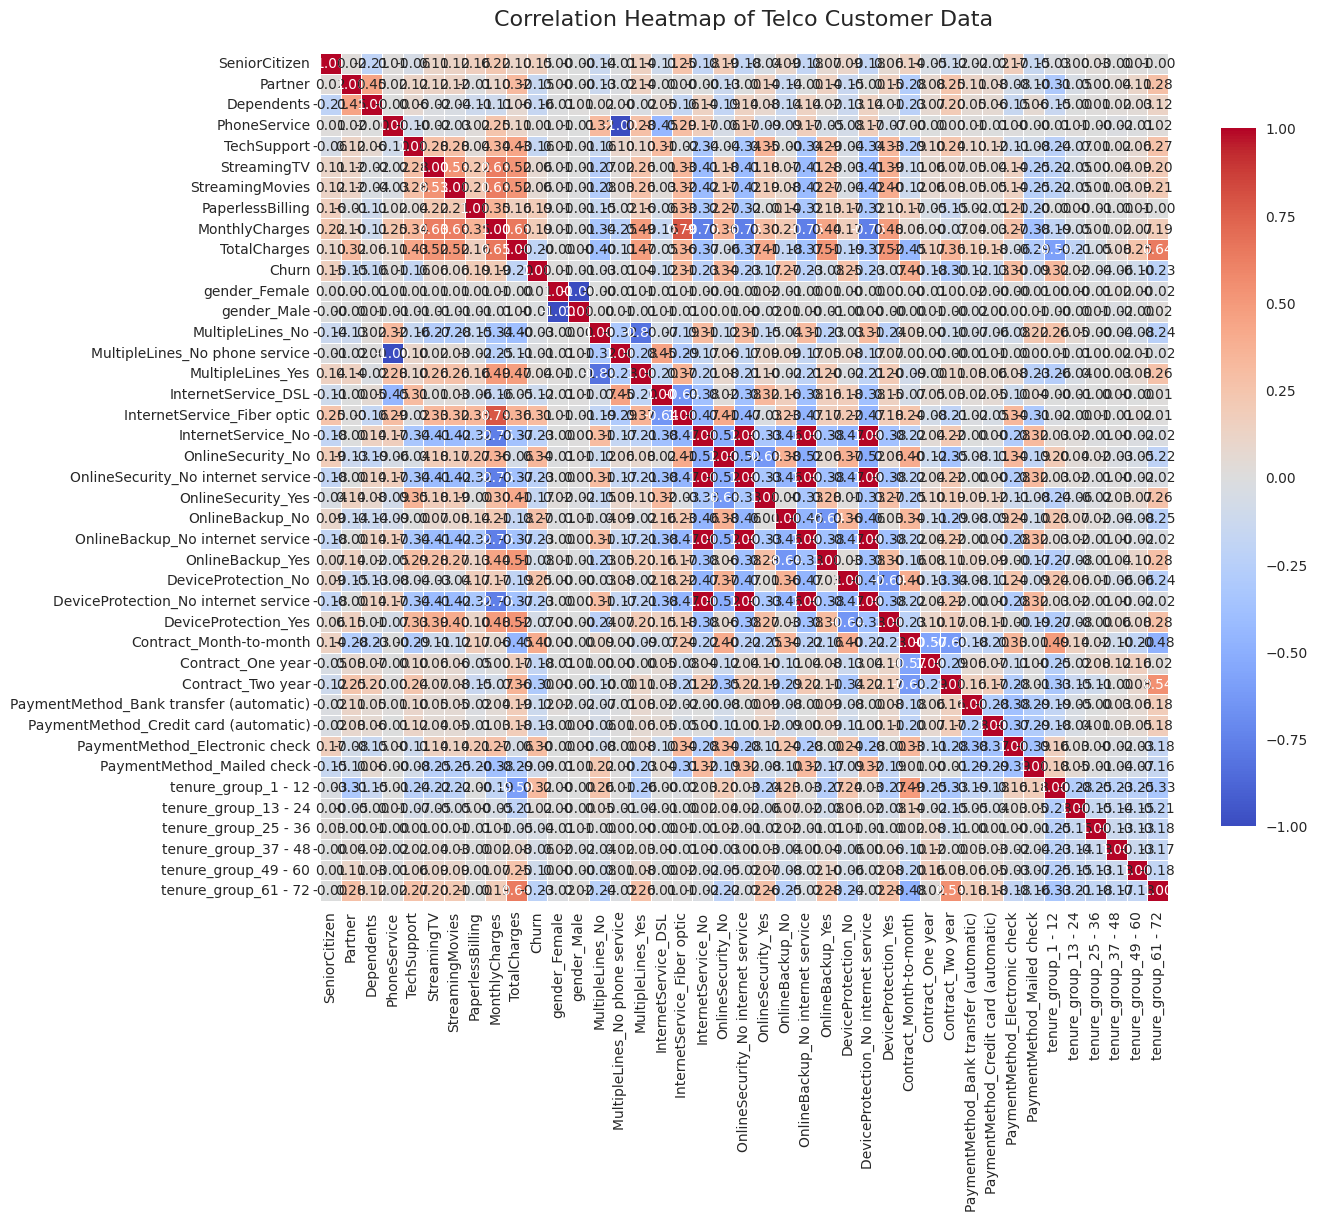

In [176]:
plt.figure(figsize=(14, 12))
sns.heatmap(customer_data.corr(),
            cmap="coolwarm",
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            center=0,
            vmin=-1,
            vmax=1,
            square=True,
            cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Telco Customer Data", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Insights from the Heatmap

## 1. Strong Positive Correlations:
- MonthlyCharges and TotalCharges have a strong positive correlation, indicating that customers with higher monthly charges tend to have higher total charges.
- Churn has strong positive correlations with MonthlyCharges, TotalCharges, gender_Male, Partner_No, Dependents_No, PhoneService_No, TechSupport_No, StreamingTV_No, StreamingMovies_No, PaperlessBilling_Yes, and PaymentMethod_Electronic check. This suggests that these factors are associated with an increased risk of churn.

## 2. Strong Negative Correlations:
- Tenure has strong negative correlations with Churn, indicating that customers with longer tenure are less likely to churn.
- SeniorCitizen has a strong negative correlation with Churn, suggesting that senior citizens are less likely to churn.
- OnlineSecurity, OnlineBackup, DeviceProtection, and InternetService_Fiber optic have strong negative correlations with Churn, indicating that customers using these services are less likely to churn.

## 3. Weak Correlations:
- MultipleLines has weak positive correlations with Churn, suggesting that customers with multiple lines have a slightly higher risk of churn.
- Contract and InternetService_DSL have weak negative correlations with Churn, indicating that customers with contracts and DSL internet service are slightly less likely to churn.

## 4. Overall Interpretation:
- The heatmap visually highlights the relationships between various features and churn.
- Factors such as high monthly charges, lack of bundled services, and absence of certain optional services are associated with increased churn risk.
- Conversely, longer tenure, senior citizen status, and usage of certain services are associated with lower churn risk.
- This information can be used to develop targeted strategies to reduce customer churn, such as offering personalized discounts, bundled packages, and improved customer support.

<font size="10">Bivariate Analysis</font>

In [188]:
# Split the dataset based on churn status
churned = df[df["Churn"] == "Yes"]
not_churned = df[df["Churn"] == "No"]

# # Calculate mean values for numerical columns
# numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
# churned_means = churned[numerical_cols].mean()
# not_churned_means = not_churned[numerical_cols].mean()

# # Create a summary DataFrame
# summary_df = pd.DataFrame({
#     "Churned": churned_means,
#     "Not Churned": not_churned_means
# })

# # Calculate the difference and percentage difference
# summary_df["Difference"] = summary_df["Churned"] - summary_df["Not Churned"]
# summary_df["Percentage Difference"] = (summary_df["Difference"] / summary_df["Not Churned"]) * 100

# # Round the values for better readability
# summary_df = summary_df.round(2)

# # Display the summary
# print(summary_df)

# # Visualize the differences
# plt.figure(figsize=(12, 6))
# summary_df[["Churned", "Not Churned"]].plot(kind="bar")
# plt.title("Comparison of Churned vs Not Churned Customers")
# plt.xlabel("Features")
# plt.ylabel("Average Values")
# plt.legend(["Churned", "Not Churned"])
# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.show()

In [189]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    fig, ax = plt.subplots()
    n_categories = len(df[col].unique())
    n_hues = len(df[hue].unique()) if hue else 1
    width = max(12, n_categories + 7 + 4 * n_hues)
    fig.set_size_inches(width, 10)

    if hue:
        sns.countplot(data=df, x=col, hue=hue, palette='bright',
                      order=df[col].value_counts().index, ax=ax)
    else:
        sns.countplot(data=df, x=col, palette='bright',
                      order=df[col].value_counts().index, ax=ax)

    plt.title(title, fontsize=24, pad=40)
    plt.xlabel(col, fontsize=20)
    plt.ylabel("Count", fontsize=20)
    plt.xticks(rotation=45, ha='right')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points', fontsize=12)

    plt.tight_layout()
    plt.show()

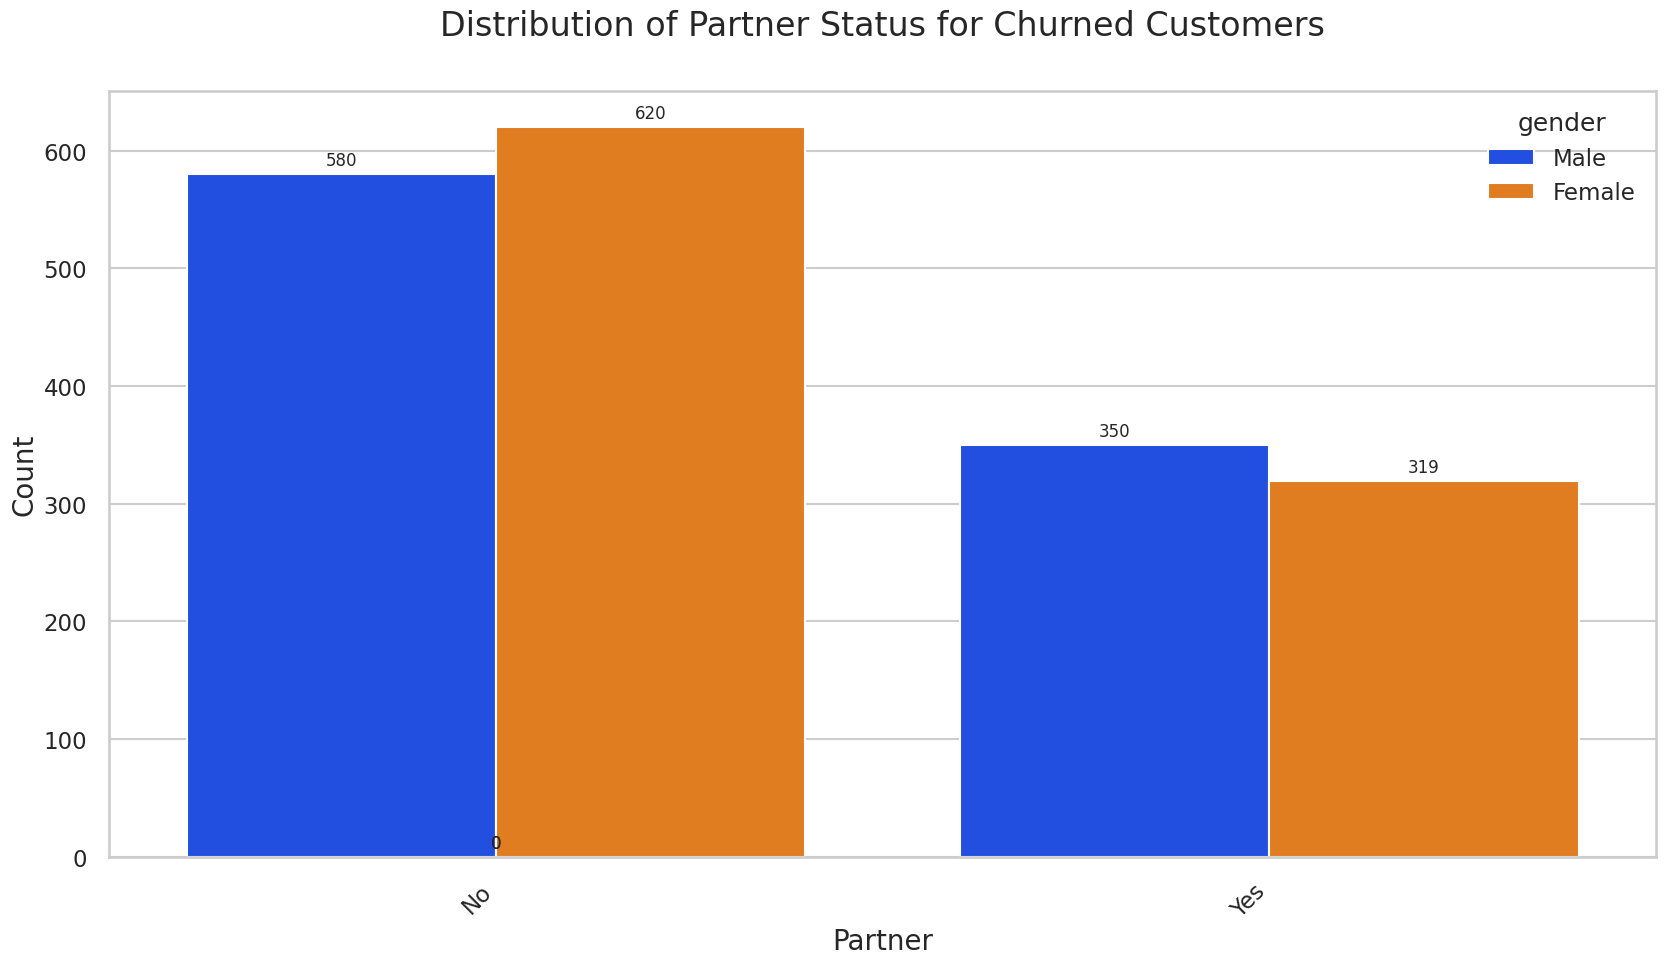

In [190]:
uniplot(churned, col='Partner', title='Distribution of Partner Status for Churned Customers',hue="gender")

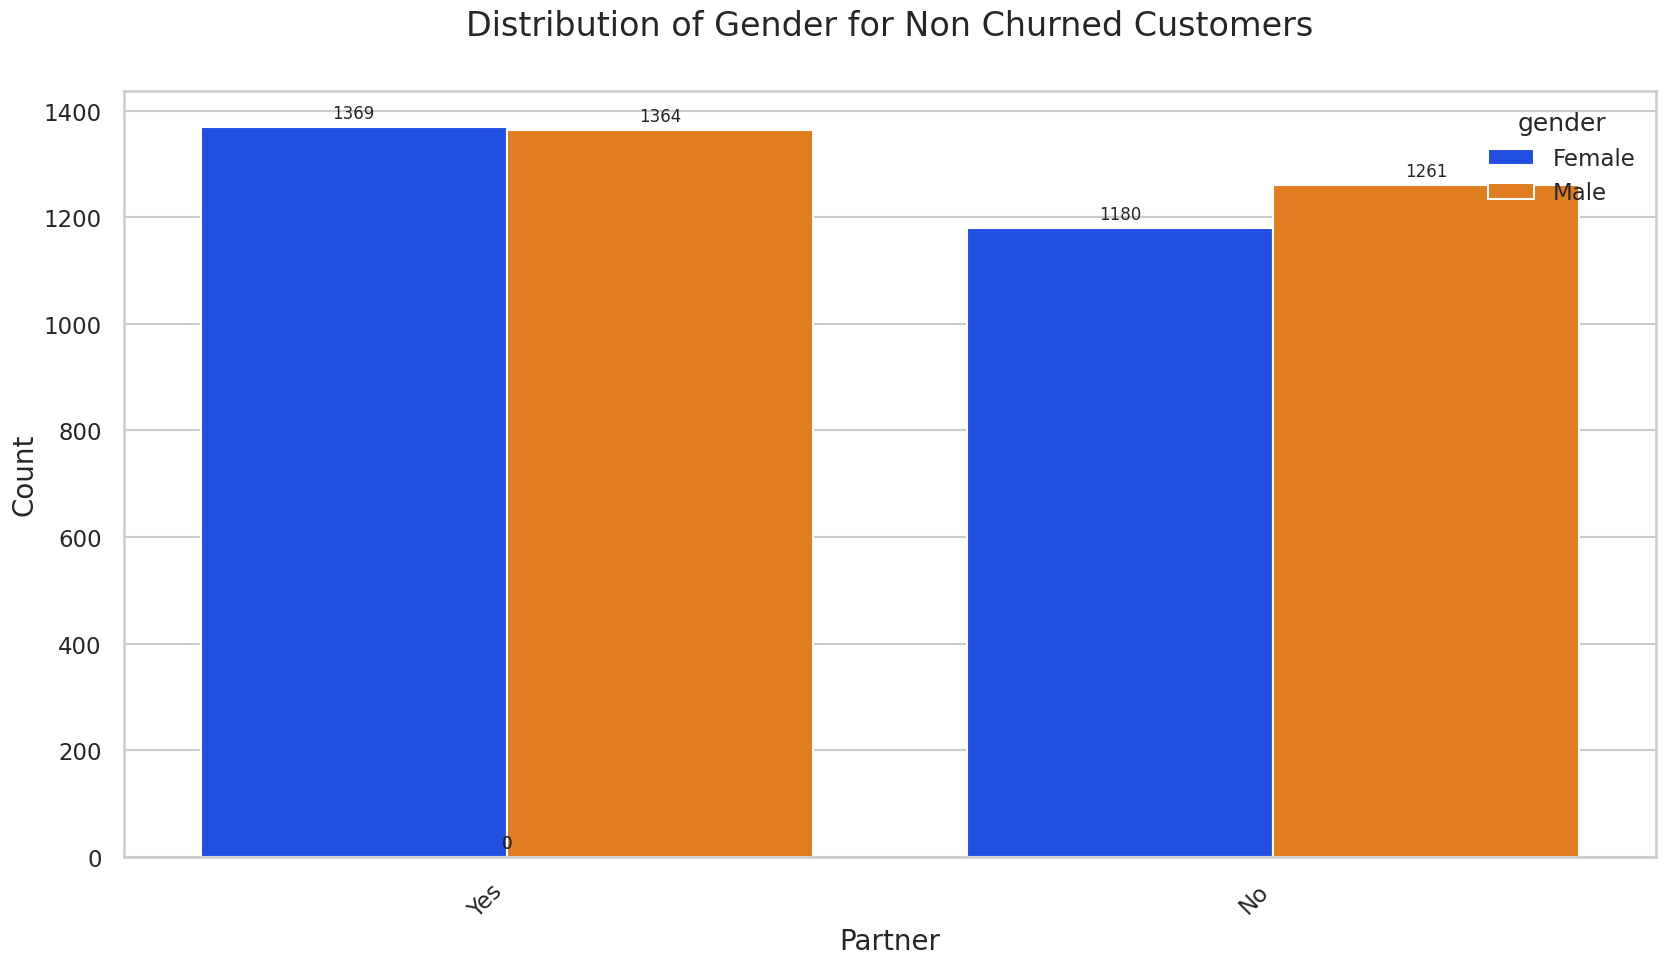

In [191]:
uniplot(not_churned,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

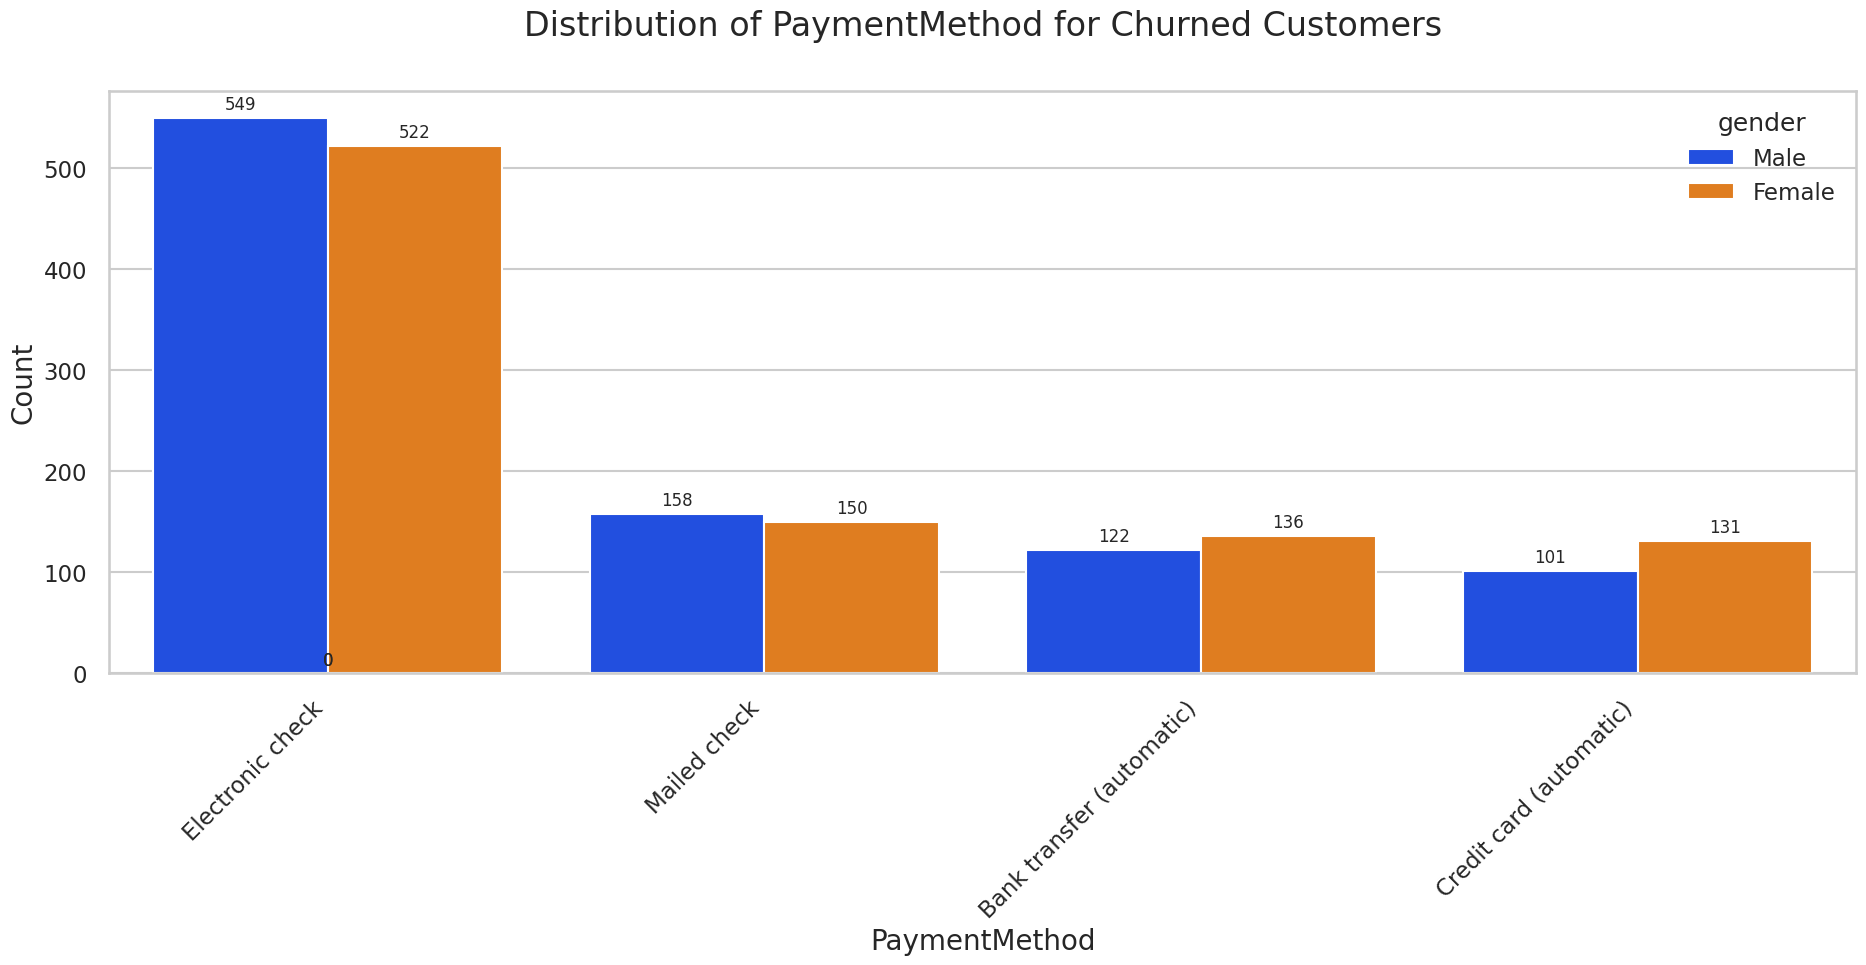

In [192]:
uniplot(churned,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

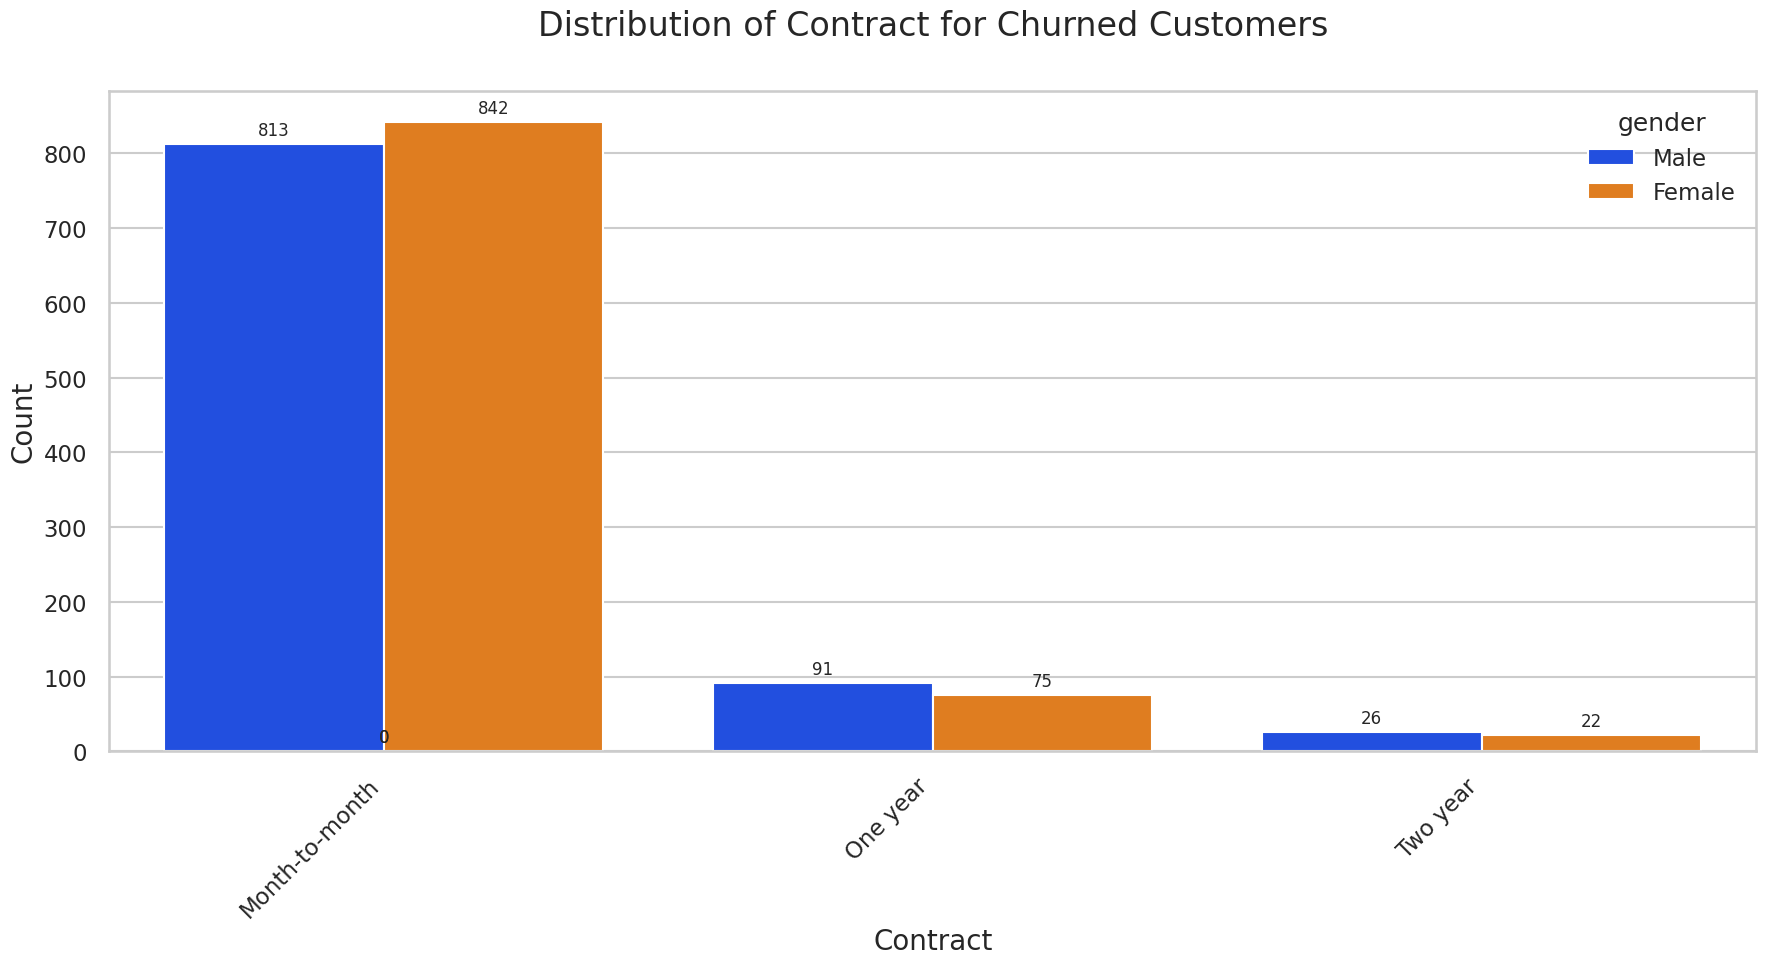

In [193]:
uniplot(churned,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

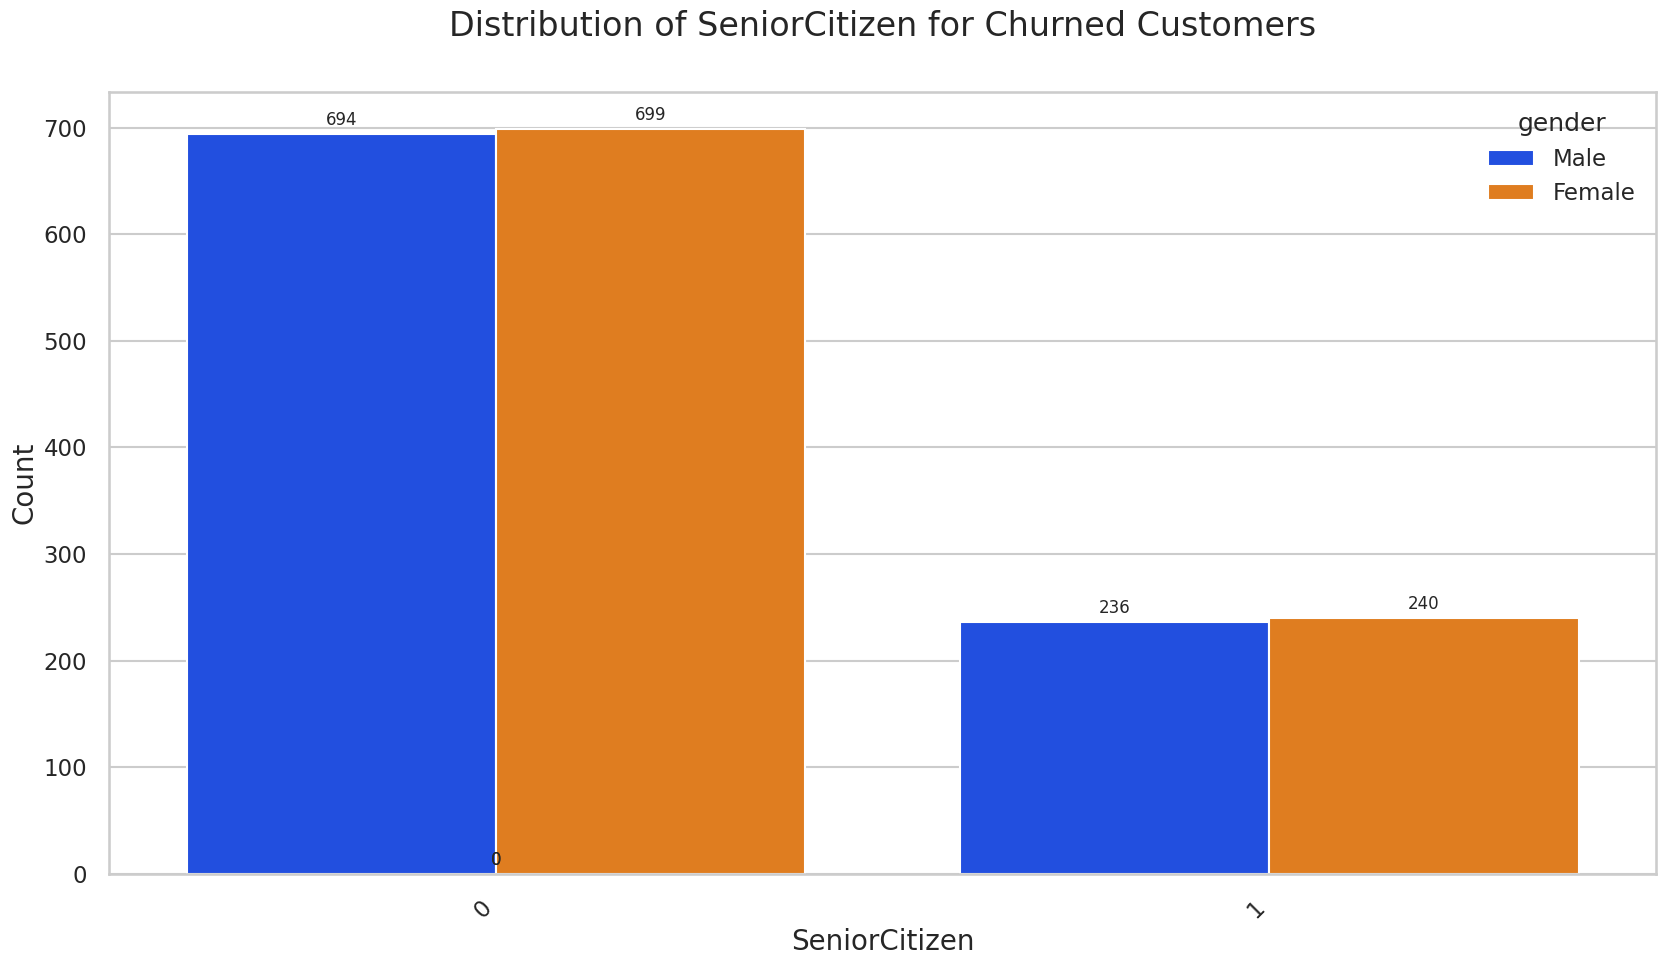

In [194]:
uniplot(churned,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# Conclusion and Next Steps

## Conclusion:
- Customers with higher monthly charges and total charges are more likely to churn.
- Customers without partners, dependents, phone service, tech support, streaming services, or paperless billing are more likely to churn.
- Customers with electronic check payment methods are more likely to churn.
- Customers in the first tenure group (0-11 months) have the highest churn risk.

## Next steps:
- Develop targeted strategies to reduce churn, such as offering personalized discounts, bundled packages, and improved customer support.
- Focus on retaining customers in the first tenure group (0-11 months) as they have the highest churn risk.
- Investigate the reasons why customers without partners, dependents, phone service, tech support, streaming services, or paperless billing are more likely to churn.
- Explore the possibility of offering incentives to customers who use electronic check payment methods to encourage them to switch to other payment methods.

In [199]:
customer_data.to_csv('/content/drive/MyDrive/Datasets/predict_churn.csv')

<font size="12">Let's build the model</font>